# 1. Problem Statement

#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.



# 2. Hypothesis

#### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

#### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more

# 3. Loading Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# 4. Loading Data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 5. Data Structure and Content

In [3]:
#Concatenate Training and test data
total = pd.concat([train,test])

total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


# 6. Exploratory Data Analysis

# A. Univariate Analysis

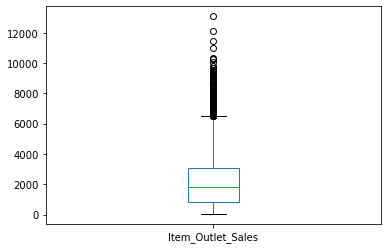

In [4]:
#Target Variable is Item_Outlet_Sales
train['Item_Outlet_Sales'].plot.box()

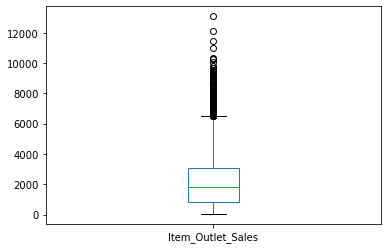

In [5]:
## OUTLIERS
# As We can see the variable is not normally distributed so be normalize the varaible
train['Item_Outlet_Sales'].plot.box()
plt.show()

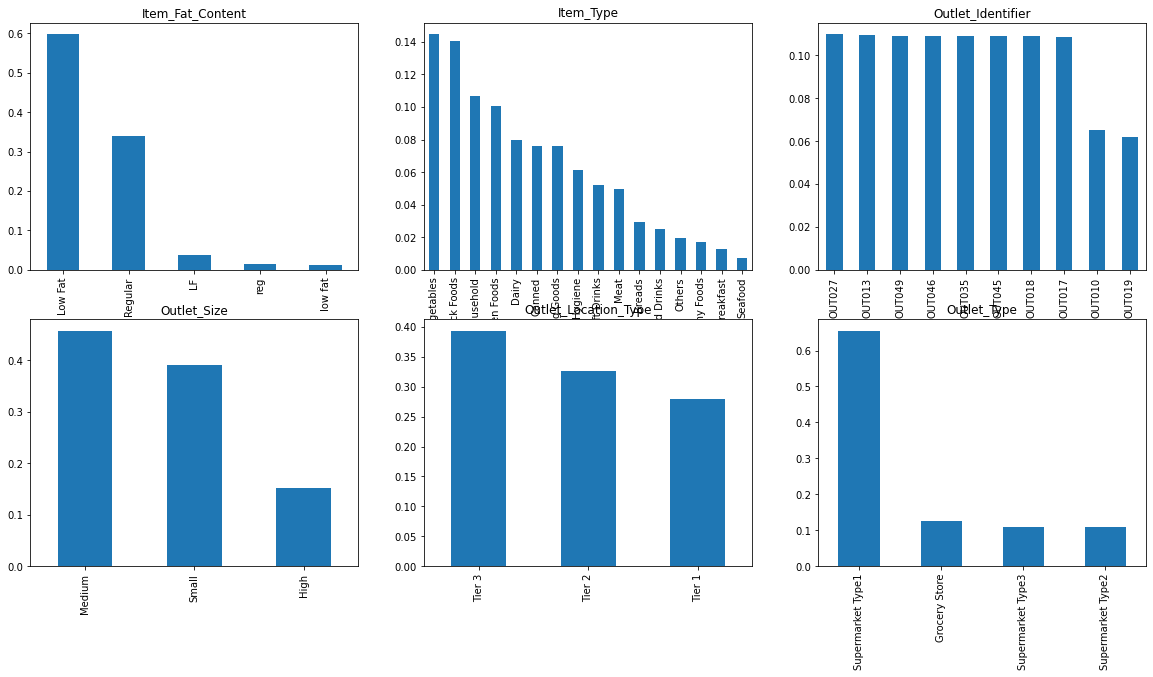

In [6]:
## 1.Independent Variables (Categorical Variables)

# 231 means "2x3 grid, 1st subplot".
plt.figure(1)
plt.subplot(231)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Fat_Content")

plt.subplot(232)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Item_Type")

plt.subplot(233)
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Identifier")

plt.subplot(234)
train['Outlet_Size'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Size")

plt.subplot(235)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Location_Type")

plt.subplot(236)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= "Outlet_Type")

plt.show()

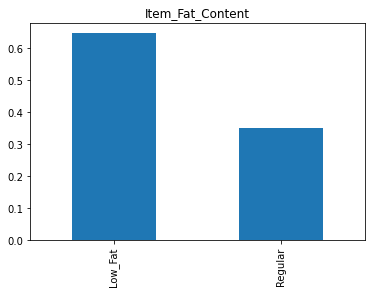

In [7]:
## INCONSISTENCIES
#(Correcting inconsistencies with data)
train['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title= "Item_Fat_Content")

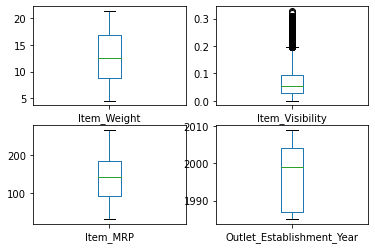

In [8]:
# 2.Independent Variable (Numerial Variables)
plt.figure(1)
plt.subplot(221)
train['Item_Weight'].plot.box()

plt.subplot(222)
train['Item_Visibility'].plot.box()

plt.subplot(223)
train['Item_MRP'].plot.box()

plt.subplot(224)
train['Outlet_Establishment_Year'].plot.box()


# B. Bivariate Analysis
#### Let's see how well each feature correlates with Item_Outlet_Sales

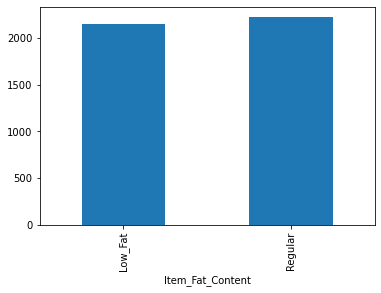

In [9]:
#Categorical Independent Variables vs Target Variable(Item_Outlet_Sales)
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

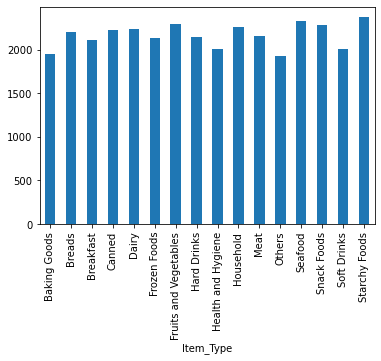

In [10]:
train.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

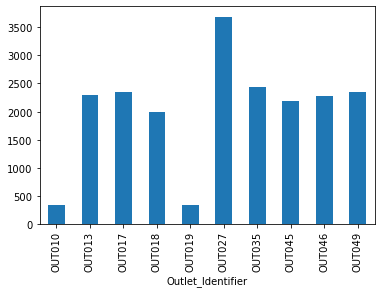

In [11]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()

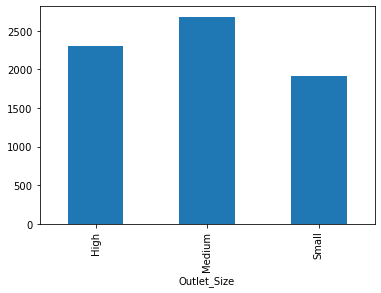

In [12]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

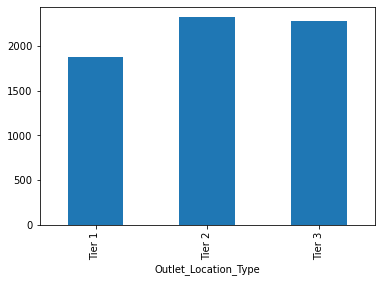

In [13]:
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

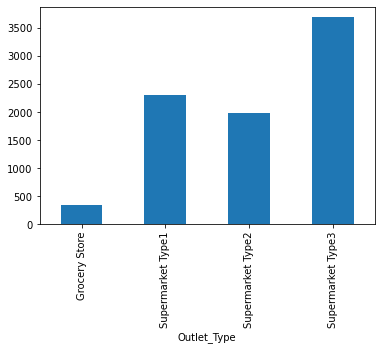

In [14]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

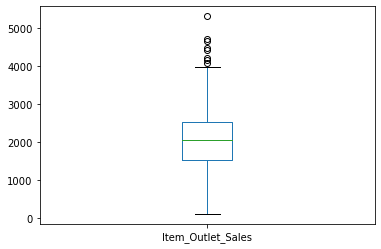

In [15]:
train.groupby('Item_Weight')['Item_Outlet_Sales'].mean().plot.box()

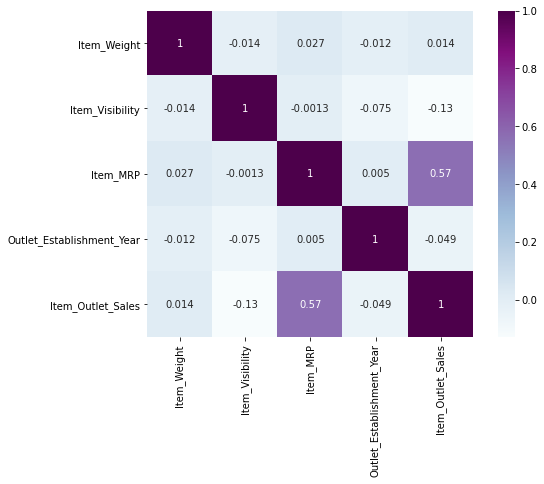

In [16]:
#Correlation between all the numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True);


# C. Missing Value Treatment

In [17]:
## 1.MISSING VALUES
# (Checking How many Null Values in training dataset)
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
# There are missing values in Item_Weight and Outlet_size features. 
# (For numerical variables: imputation using mean/median, For categorical variables: imputation using mode)
# Lets Deal with Item_Weight First which is a Numerical Variable
train['Item_Weight'].value_counts()
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [19]:
# Lets Deal with Outlet_Size Second which is a Categorical Variable
train['Outlet_Size'].value_counts()
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [20]:
# Checking How many Null Values in training dataset
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# D. Feature Engineering

In [21]:
#Determine the years of operation of a store (For 2013- according to problem statement)
train['Outlet_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Year'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Year, dtype: float64

# 7. Encoding Categorical Variables

# A.Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['Item_Fat_Content'] = label_encoder.fit_transform(train.loc[:,'Item_Fat_Content'])
train['Outlet_Location_Type'] = label_encoder.fit_transform(train.loc[:,'Outlet_Location_Type'])
train['Outlet_Size'] = label_encoder.fit_transform(train.loc[:,'Outlet_Size'])
train['Outlet_Type'] = label_encoder.fit_transform(train.loc[:,'Outlet_Type'])
train['Item_Type'] = label_encoder.fit_transform(train.loc[:,'Item_Type'])
train['Outlet_Identifier'] = label_encoder.fit_transform(train.loc[:,'Outlet_Identifier'])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,15
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,26


# B.One Hot Encoding

In [23]:
# Dummy Varaibles
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type', 'Item_Type','Outlet_Identifier'])

# 8. PreProcessing Data

In [24]:
# Modify Item_Visibility
null_visibility = (train['Item_Visibility'] == 0)
print ('Number of 0 values initially', sum(null_visibility))

Number of 0 values initially 526


In [25]:
avg_item_visibility = train['Item_Visibility'].mean()
print(avg_item_visibility)
train['Item_Visibility']=train['Item_Visibility'].replace(0,avg_item_visibility)
print ('Number of 0 values finally', sum(null_visibility))

0.06613202877895127
Number of 0 values finally 526


In [26]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# 9. Modeling

# A. Linear Regression

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,regression

predictors=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type',
            'Outlet_Type','Outlet_Year']

X = train[predictors]
y = train.Item_Outlet_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

C:\Users\IES\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [29]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
predictions=lr.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 1193.2979200782368


# B. Ridge Regression

In [31]:
Rg = linear_model.Ridge(alpha=1)
Rg.fit(X_train,y_train)

Ridge(alpha=1)

In [32]:
pred2 = Rg.predict(X_test)
Rg.coef_

array([-2.45353205e+00,  4.57723839e+01, -1.33610101e+03,  6.47896841e-01,
        1.55461209e+01,  5.98671737e+01,  7.15902058e-01, -3.41526555e+02,
       -2.22708051e+02,  8.79528974e+02, -7.15902056e-01])

In [33]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

RMSE: 1193.3443752031048


In [34]:
for alpha in [0,1,10,20,50,100,1000]:
    Rid = linear_model.Ridge(alpha=alpha,normalize=True)
    Rmod = Rid.fit(X_train,y_train)
    train_score = Rmod.score(X_train,y_train)
    num_coef = np.sum(abs(Rmod.coef_)>1.0)
    print('alpha:',alpha,'\t','R-sq:',train_score)
    print('number of coeff:',num_coef)

alpha: 0 	 R-sq: 0.5094771937782949
number of coeff: 10
alpha: 1 	 R-sq: 0.38559764995197765
number of coeff: 10
alpha: 10 	 R-sq: 0.09320588664488783
number of coeff: 7
alpha: 20 	 R-sq: 0.05029321008276921
number of coeff: 6
alpha: 50 	 R-sq: 0.02111349266509477
number of coeff: 6
alpha: 100 	 R-sq: 0.010733345267793903
number of coeff: 4
alpha: 1000 	 R-sq: 0.0010897172092065865
number of coeff: 1


C:\Users\IES\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.60199e-17): result may not be accurate.
  overwrite_a=True).T


# C. Lasso Regression

In [35]:
Lg = linear_model.Lasso(alpha=1)
Lg = Lg.fit(X_train,y_train)
pred3 = Lg.predict(X_test)

In [36]:
#print('R-Squared:',metrics.r2_score(y_test,pred3))

#print('MAE:', metrics.mean_absolute_error(y_test, pred3))
#print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

RMSE: 1193.708974222033


In [37]:
for alpha in [0,1,10,20,50,100,1000]:
    Lid = linear_model.Lasso(alpha=alpha,normalize=True)
    Lmod = Lid.fit(X_train,y_train)
    train_score = Lmod.score(X_train,y_train)
    num_coef = np.sum(abs(Lmod.coef_)>1.0)
    print('alpha:',alpha,'\t','R-sq:',train_score)
    print('number of coeff:',num_coef)

C:\Users\IES\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IES\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\IES\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4862747124.582106, tolerance: 1982679.3221044426
  positive)


alpha: 0 	 R-sq: 0.509477193778295
number of coeff: 10
alpha: 1 	 R-sq: 0.49427336064433847
number of coeff: 5
alpha: 10 	 R-sq: 0.08970732942445625
number of coeff: 1
alpha: 20 	 R-sq: 0.0
number of coeff: 0
alpha: 50 	 R-sq: 0.0
number of coeff: 0
alpha: 100 	 R-sq: 0.0
number of coeff: 0
alpha: 1000 	 R-sq: 0.0
number of coeff: 0


# D. XGradient Boosting

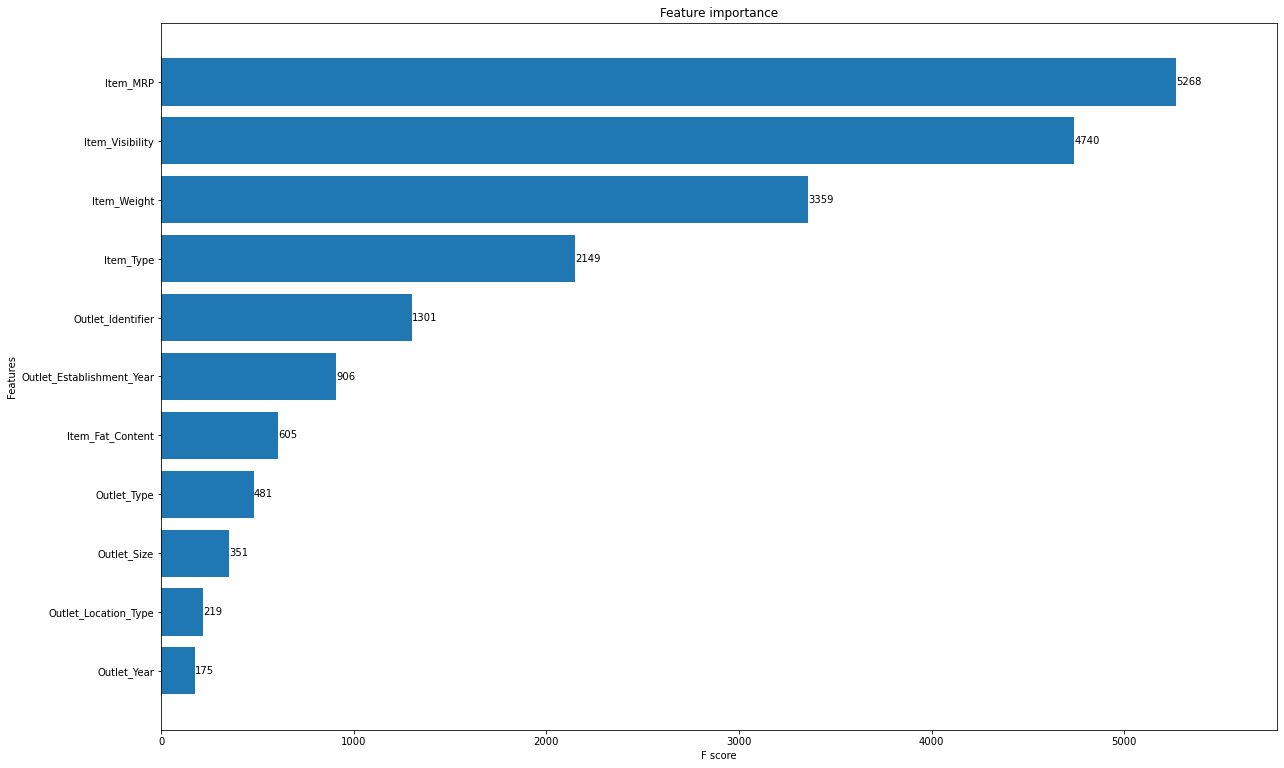

In [38]:
X_xgb = train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year']]
y_xgb = train['Item_Outlet_Sales']
#Analyze Variable Importance using XGB
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0,
    'lambda':5
}

train = xgb.DMatrix(X_xgb,y_xgb)
boost_model = xgb.train(xgb_params,train,num_boost_round=150)
fig, ax = plt.subplots(1,1,figsize= (20, 13))
xgb.plot_importance(boost_model, grid = False, height= 0.8, ax=ax)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.30, random_state=42)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
lr.score(X_train,y_train)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))

RMSE: 1168.2467481983824


In [41]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,14
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,4
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,14
3,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,15
4,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,26


# E. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
predictions = regressor.predict(X_test)
predictions[:5]


print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 1497.9095923350915


# F. Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=43)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=43)

In [46]:
predictions = rf.predict(X_test)
predictions[:5]

RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print('RMSE:', RMSE)

RMSE: 1121.0570683758613


In [47]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,736.374800
2957,356.8688,955.196628
7031,377.5086,552.367654
1084,5778.4782,5378.565430
856,2356.9320,2350.766692


In [48]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 554.6114, 1249.0408,  564.5984, ...,  769.6648, 1284.994 ,
       3739.1328])

In [55]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

accuracies.mean()

0.18429345492756516